

### model 7 - Adding Capacity to the Model 

#### Target:
1. Increasing the number of parameters to the GAP Model
2. Matching the requirements with respect to parameters

#### Results:
Total parameters: 7,598
Best Training Accuracy - 98.92 at the 15th Epoch
Best Testing Accuracy - 99.20 at the 15th epoch

#### Analysis:
1. The total parameters is increased by adding more capacity to the model. 
2. The model seems to be efficient. 
3. The model has lesser gap between the train and test accuracy compared to the previous model 
4. We have met some of our objectives in terms of less than 8k parameters, 15 epochs


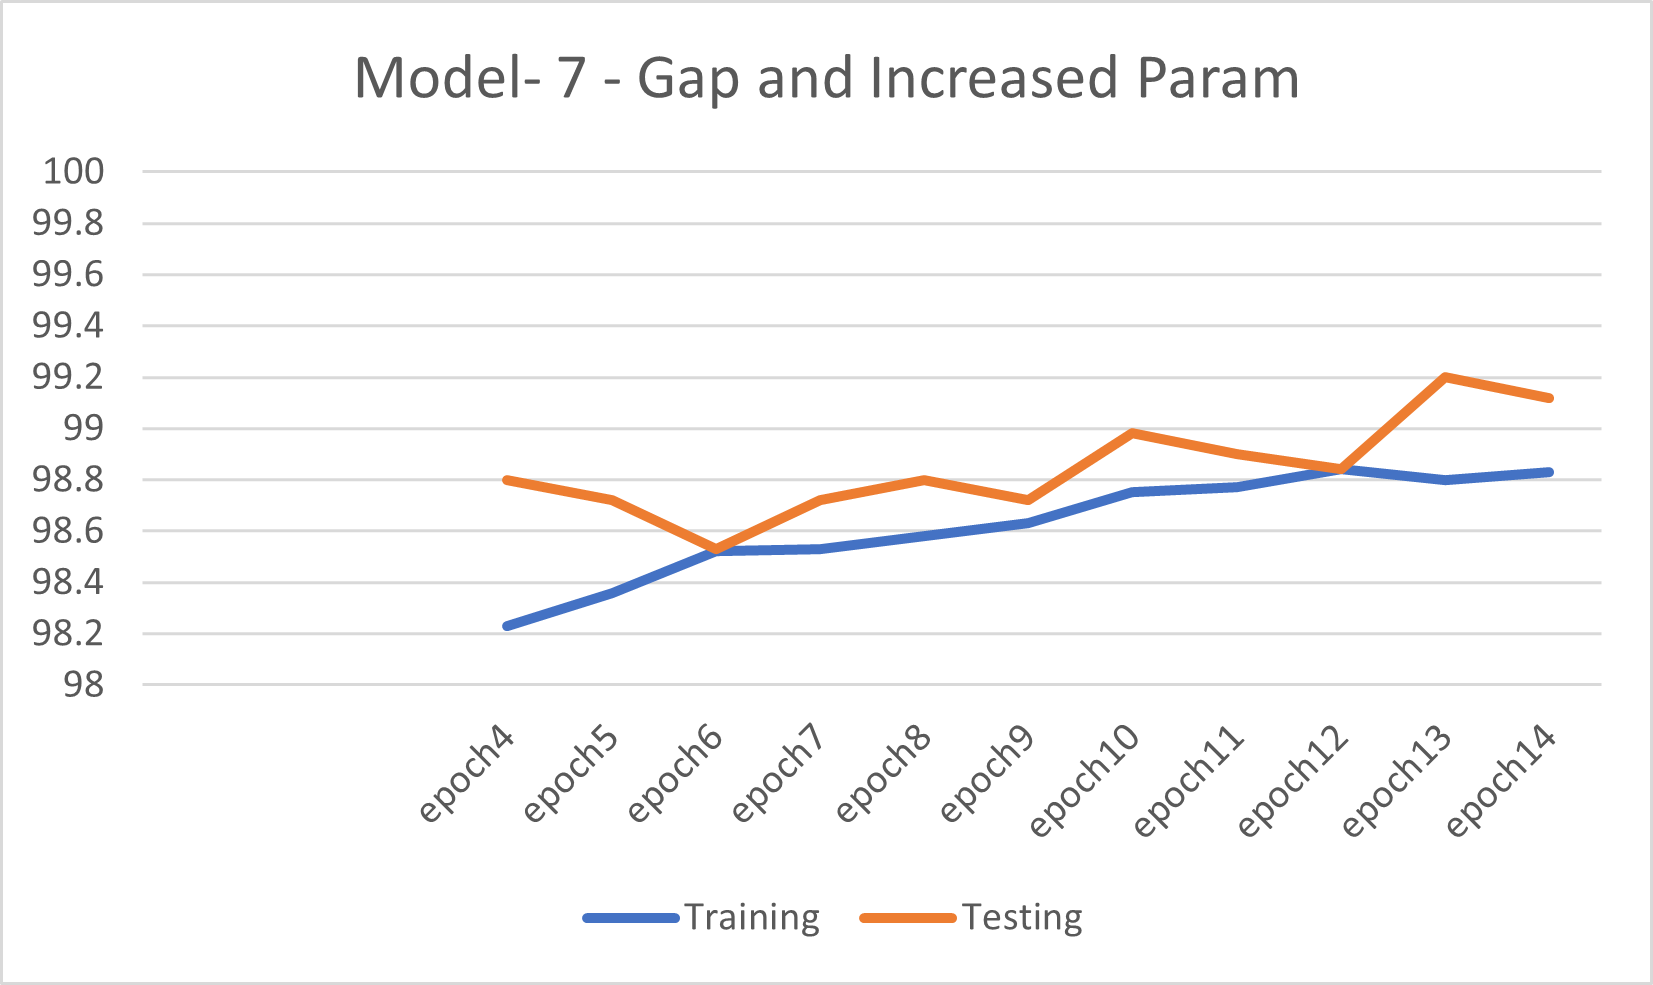


# Import Libraries

In [1]:
from __future__ import print_function
import torch
# import torch.nn as nn
# import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms
from utils import train_test_dataloader
import models
from models import model_summary, train, test, plot_accuracy_loss, model7

## Data Transformations

We first start with defining our data transformations. We need to think what our data is and how can we augment it to correct represent images which it might not see otherwise.


In [2]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print("Device: ", device)


# Train data transformations
train_transformer = [transforms.RandomRotation((-7., 7.), fill=0),transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,)),]

# Test Phase transformations
test_transformer = [transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))]

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train and test dataloader
train_loader,test_loader = train_test_dataloader(train_transformer, test_transformer, dataloader_args)

CUDA Available? True
Device:  cuda


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


# Model Params
Can't emphasize on how important viewing Model Summary is.
Unfortunately, there is no in-built model visualizer, so we have to take external help

In [3]:
# sending model to device
model = model7().to(device)

# Generating model summary
model_summary(model,(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 28, 28]              90
       BatchNorm2d-2           [-1, 10, 28, 28]              20
              ReLU-3           [-1, 10, 28, 28]               0
           Dropout-4           [-1, 10, 28, 28]               0
            Conv2d-5           [-1, 12, 28, 28]           1,080
       BatchNorm2d-6           [-1, 12, 28, 28]              24
              ReLU-7           [-1, 12, 28, 28]               0
           Dropout-8           [-1, 12, 28, 28]               0
         MaxPool2d-9           [-1, 12, 14, 14]               0
           Conv2d-10           [-1, 10, 14, 14]             120
             ReLU-11           [-1, 10, 14, 14]               0
           Conv2d-12           [-1, 16, 12, 12]           1,440
      BatchNorm2d-13           [-1, 16, 12, 12]              32
             ReLU-14           [-1, 16,

# Let's Train and test our model

In [4]:
model =  model7().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

EPOCH: 0


Loss=0.1487833708524704 Batch_id=468 Accuracy=75.23: 100%|██████████| 469/469 [00:26<00:00, 17.56it/s]



Test set: Average loss: 0.1880, Accuracy: 9578/10000 (95.78%)

EPOCH: 1


Loss=0.08506836742162704 Batch_id=468 Accuracy=96.70: 100%|██████████| 469/469 [00:23<00:00, 20.21it/s]



Test set: Average loss: 0.1084, Accuracy: 9700/10000 (97.00%)

EPOCH: 2


Loss=0.062350332736968994 Batch_id=468 Accuracy=97.64: 100%|██████████| 469/469 [00:23<00:00, 19.66it/s]



Test set: Average loss: 0.0587, Accuracy: 9840/10000 (98.40%)

EPOCH: 3


Loss=0.03949262946844101 Batch_id=468 Accuracy=97.97: 100%|██████████| 469/469 [00:23<00:00, 20.14it/s]



Test set: Average loss: 0.0718, Accuracy: 9773/10000 (97.73%)

EPOCH: 4


Loss=0.059323955327272415 Batch_id=468 Accuracy=98.23: 100%|██████████| 469/469 [00:24<00:00, 18.87it/s]



Test set: Average loss: 0.0442, Accuracy: 9880/10000 (98.80%)

EPOCH: 5


Loss=0.0239084642380476 Batch_id=468 Accuracy=98.38: 100%|██████████| 469/469 [00:23<00:00, 20.37it/s]



Test set: Average loss: 0.0465, Accuracy: 9872/10000 (98.72%)

EPOCH: 6


Loss=0.027330510318279266 Batch_id=468 Accuracy=98.53: 100%|██████████| 469/469 [00:23<00:00, 20.37it/s]



Test set: Average loss: 0.0522, Accuracy: 9853/10000 (98.53%)

EPOCH: 7


Loss=0.049293484538793564 Batch_id=468 Accuracy=98.58: 100%|██████████| 469/469 [00:23<00:00, 20.34it/s]



Test set: Average loss: 0.0450, Accuracy: 9872/10000 (98.72%)

EPOCH: 8


Loss=0.04976995289325714 Batch_id=468 Accuracy=98.63: 100%|██████████| 469/469 [00:22<00:00, 20.47it/s]



Test set: Average loss: 0.0340, Accuracy: 9898/10000 (98.98%)

EPOCH: 9


Loss=0.04783612862229347 Batch_id=468 Accuracy=98.75: 100%|██████████| 469/469 [00:22<00:00, 20.50it/s]



Test set: Average loss: 0.0388, Accuracy: 9890/10000 (98.90%)

EPOCH: 10


Loss=0.03623427823185921 Batch_id=468 Accuracy=98.77: 100%|██████████| 469/469 [00:23<00:00, 20.20it/s]



Test set: Average loss: 0.0380, Accuracy: 9884/10000 (98.84%)

EPOCH: 11


Loss=0.029798954725265503 Batch_id=468 Accuracy=98.84: 100%|██████████| 469/469 [00:23<00:00, 20.10it/s]



Test set: Average loss: 0.0293, Accuracy: 9920/10000 (99.20%)

EPOCH: 12


Loss=0.02194998599588871 Batch_id=468 Accuracy=98.80: 100%|██████████| 469/469 [00:23<00:00, 20.08it/s]



Test set: Average loss: 0.0310, Accuracy: 9912/10000 (99.12%)

EPOCH: 13


Loss=0.01991269364953041 Batch_id=468 Accuracy=98.83: 100%|██████████| 469/469 [00:25<00:00, 18.53it/s]



Test set: Average loss: 0.0314, Accuracy: 9910/10000 (99.10%)

EPOCH: 14


Loss=0.05570480599999428 Batch_id=468 Accuracy=98.92: 100%|██████████| 469/469 [00:23<00:00, 19.64it/s]



Test set: Average loss: 0.0288, Accuracy: 9917/10000 (99.17%)



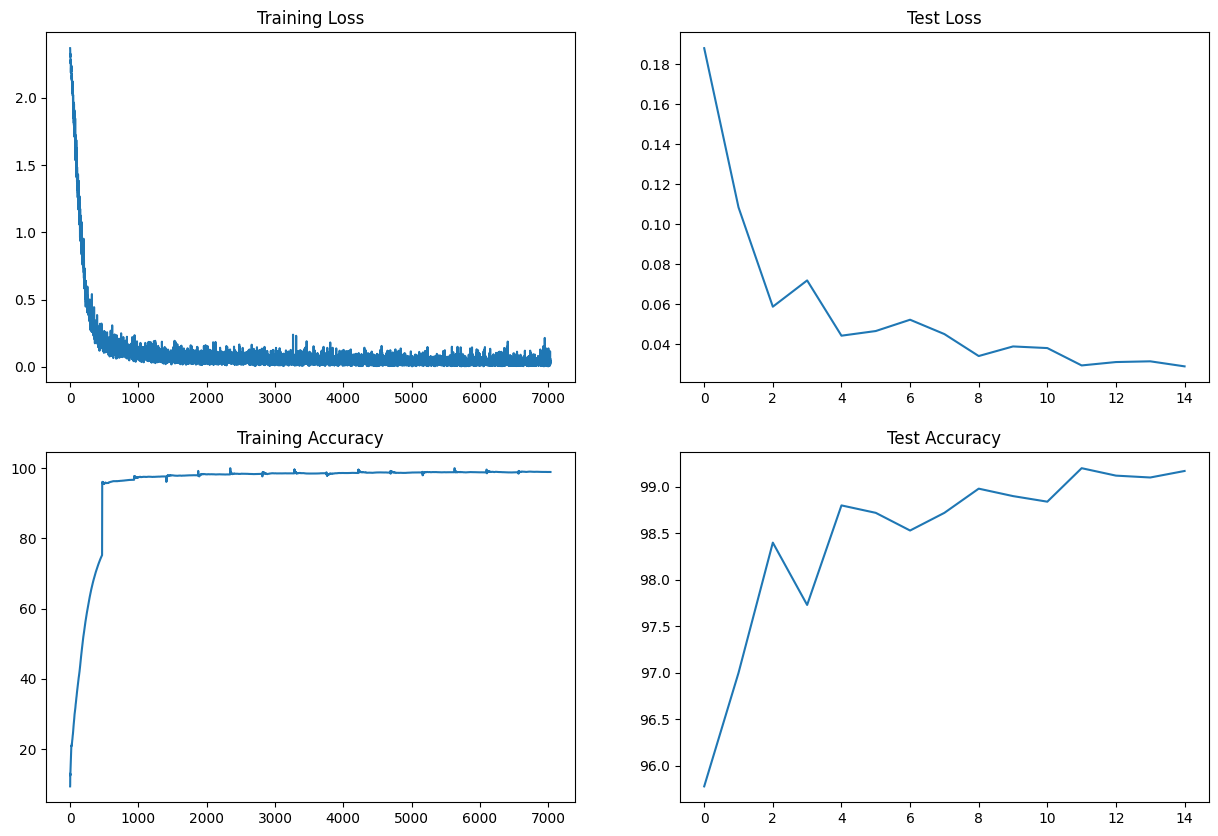

In [5]:
plot_accuracy_loss()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


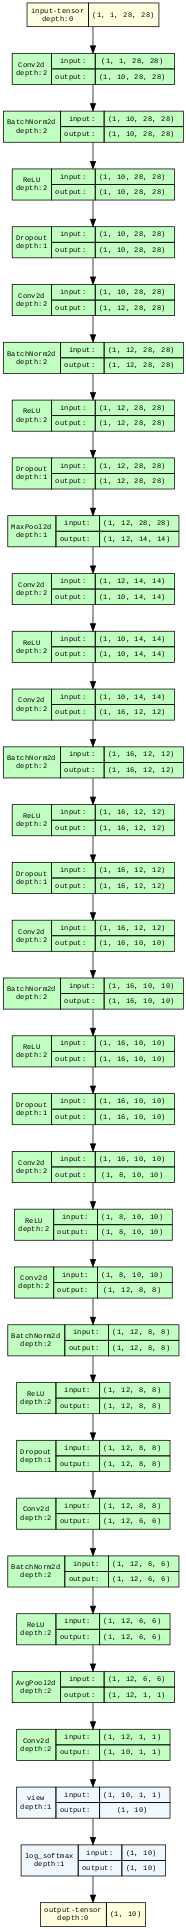

In [6]:
import torchvision
!pip install torchview
from torchview import draw_graph
import graphviz
graphviz.set_jupyter_format('png')
model_graph = draw_graph(model7(), input_size=(1,1,28,28), expand_nested=False)
model_graph.visual_graph